In [1]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import * 
import os

In [2]:
path='/home/hiep/Desktop/trainv5/TRAIN'
print(os.listdir(path))

['Lisianthus', 'Carnation', 'Hydrangea', 'Lily flower', 'Jacaranda', 'models', 'Gladiolus', 'Sunflower', 'Lavender', 'Tulips', 'Rose']


In [5]:
data = ImageDataLoaders.from_folder(path,valid_pct=0.2, batch_tfms=[*aug_transforms(max_rotate=20, max_zoom=1.5, max_lighting=0.5, max_warp=0.4, p_affine=1., p_lighting=1.,size=224), Normalize.from_stats(*imagenet_stats)], item_tfms=RandomResizedCrop(450, min_scale=0.75))

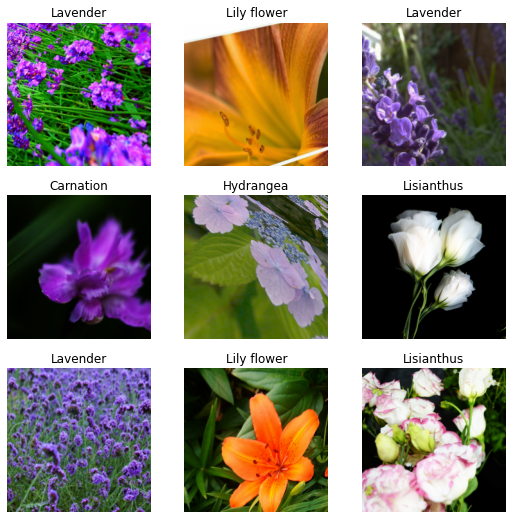

In [6]:
data.show_batch()

In [7]:
from torchvision.models import *

#model=cnn_learner(data,models.densenet201,metrics=accuracy)
model=cnn_learner(data,densenet201,metrics=accuracy)

In [8]:
model.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 128 x 56 x 56   8,192      False     
_________________________________________________

In [ ]:
model.fit(5)